## Infos
### Transactions (20.712.225 linhas)

| Campo | Tipo |
|-------|------|
| msno | String |
| payment_method_id | Int (categoria) |
| payment_plan_days | Int |
| plan_list_price | Int |
| actual_amount_paid | Int |
| is_auto_renew | Boolean |
| transaction_date | Datetime |
| membership_expire_date | Datetime |
| is_cancel | Boolean |
| safra | Datetime (ano + mês do campo transaction_date) |

<br>

**TODO**<br>
- Podemos remover o campo `safra` pois ele está contido em `transaction_date`
- Separar campos Datetime em ano, mês e dia
- Criar um campo de "desconto": diferença entre o plano do preço e o valor pago

__________
### Members (63.867.246 linhas)
| Campo | Tipo |
|-------|------|
| msno | String |
| safra | Datetime |
| registration_init_time | Datetime |
| city | Int (categoria) |
| bd | Int |
| gender | String / Nulo (categoria) |
| registered_via | Int (categoria) |
| is_ativo | Boolean |

<br>

**TODO**<br>
- Renomear "is_ativo" para "is_active" para manter o padrão de nomenclatura
- Separar campos Datetime em ano, mês e dia

__________
### User logs (26.758.971 linhas)
| Campo | Tipo |
|-------|------|
| msno | String |
| safra | Integer |
| num_25 | Integer |
| num_50 | Integer |
| num_75 | Integer |
| num_985 | Integer |
| num_100 | Integer |
| num_unq | Integer |
| total_secs | Float |

<br>

**TODO**<br>
- Transformar campo safra de data para
- Separar campos Datetime em ano, mês e dia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def check_if_float_field_is_integer(df: pd.DataFrame, field: str) -> bool:
    calc = (df[field].astype(int) == df[field]).value_counts()
    return False not in calc.keys()

# Transactions

In [ ]:
transactions_df = pd.read_parquet('../data/transactions.parquet')

In [ ]:
print(f'Rows qty: {len(transactions_df)}')

In [ ]:
transactions_df.columns

In [ ]:
# Checking if safra is inside transaction_date column
# If yes, we can remove this field
for index, row in transactions_df.iterrows():
    if str(row['safra']) not in str(row['transaction_date']):
        print(f'Found! {row}')

In [ ]:
transactions_df.head()

# Members

In [3]:
members_df = pd.read_parquet(
    '../data/members.parquet'
)

In [4]:
print(f'Rows qty: {len(members_df)}')

Rows qty: 63867246


In [5]:
members_df.columns

Index(['msno', 'safra', 'registration_init_time', 'city', 'bd', 'gender',
       'registered_via', 'is_ativo'],
      dtype='object')

In [6]:
members_df.head(20)

,msno,safra,registration_init_time,city,bd,gender,registered_via,is_ativo
0,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,201612,20140927,1,0,None,7,1
1,++/AwGzubug3gT6J+0STBGMdWKxaM+UFZTI8Tcmq4To=,201607,20150322,1,0,None,9,0
2,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,201601,20121217,15,32,male,3,1
3,++02XbtviomSxcIBUHMOiJkjRxdicTXSfiVqLdsr5lo=,201603,20131112,14,21,male,7,0
4,++0O0Bq04sB/9ZcOS+pajpYL2Hin9jCqnc/8bKzKFuE=,201610,20141021,5,33,male,3,0
5,++2AQgVgYUAqJDw684tbDqDffUeKhqydyQmbr8lz9lQ=,201608,20150416,18,23,male,3,0
6,++2gRJ7i2MbO6qUG6rGfFnu/Fcv+hdX4YvTkZD+PUsk=,201608,20140616,11,33,male,7,0
7,++3brN43Yd6GURegTBR85oMQcJrgW1+/N4B8Rjj75fY=,201604,20100512,14,19,male,9,0
8,++4FwgRp7pHuuQWpaUFrCTgJbXVwNTTQpLB2bM1A3lU=,201605,20141010,1,0,None,9,0
9,++4KsBMCDgIrwmv5w2g2cCXhzCsJwDyB5r96/FrwGek=,201604,20141031,1,0,None,9,0


# User Logs

In [3]:
user_logs_df = pd.read_parquet('../data/user_logs.parquet')

In [4]:
print(f'Rows qty: {len(user_logs_df)}')

Rows qty: 26758971


In [5]:
user_logs_df.columns

Index(['msno', 'safra', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs'],
      dtype='object')

In [6]:
user_logs_df.head(20)

,msno,safra,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,SwlrSivYHoKF9V5wm1YYYAnjHpd9y3OPjI9rDUhGJ3k=,201701,121.0,28.0,14.0,29.0,704.0,827.0,184606.903
1,rE5wSmHEF1Dhu55zhkiGB1HvotdlSHcIMGXv6VcqO2A=,201605,26.0,2.0,5.0,6.0,462.0,256.0,119439.485
2,hx+cyaQ/Jcdr/Z5foa/Cn0PXUzC/F7QO/NQvWQS1Qtc=,201611,161.0,71.0,49.0,34.0,668.0,891.0,204791.242
3,53QW6B70J23X2UCvxaaUppjyE0b6X9nzP79W4huZv+Q=,201502,37.0,9.0,3.0,9.0,408.0,447.0,101186.041
4,/0S1N/oRyxGLZlzxnW5rOjfo0ZAls9EH23ahuDNuqz8=,201506,205.0,49.0,23.0,21.0,225.0,489.0,69957.524
5,qB/zteXKaOk3hzFCoIUD6wrTp57hnreDX4Vvon25MfM=,201509,52.0,10.0,10.0,20.0,308.0,264.0,81703.877
6,7btpXOqzA1ggOggSW81L05zDYyDjO7dXgmwZVzYmI2Q=,201610,159.0,53.0,30.0,43.0,1075.0,881.0,305353.791
7,kgEhriAqTydVKQ1xn+ZzKQzf4sQ1aod5zcEg5ksyWrE=,201609,88.0,13.0,14.0,13.0,588.0,325.0,159511.737
8,8uQ6M7OzdWsuzo0BRZ6siIPZfBoG43bRvlm+My36B6k=,201509,62.0,27.0,15.0,6.0,1389.0,1427.0,324691.011
9,T2gUhlBhFMoSFA9jFI/BkuyE/EPA6oneabYQiGBy9wU=,201702,36.0,23.0,5.0,9.0,216.0,241.0,56296.340


In [7]:
user_logs_df.dtypes

msno           object
safra           int32
num_25        float64
num_50        float64
num_75        float64
num_985       float64
num_100       float64
num_unq       float64
total_secs    float64
dtype: object

In [8]:
# Checking if all float fields are, actually, integers
cols = [
    'num_25',
    'num_50',
    'num_75',
    'num_985',
    'num_100',
    'num_unq',
    'total_secs',
]
for c in cols:
    is_int = check_if_float_field_is_integer(user_logs_df, c)
    print(f'Col {c} is actually integer? {is_int}')
    
    if is_int:
        print(f'Converting to integer')
        user_logs_df[c] = user_logs_df[c].astype(int)

Col num_25 is actually integer? True
Converting to integer
Col num_50 is actually integer? True
Converting to integer
Col num_75 is actually integer? True
Converting to integer
Col num_985 is actually integer? True
Converting to integer
Col num_100 is actually integer? True
Converting to integer
Col num_unq is actually integer? True
Converting to integer
Col total_secs is actually integer? False


In [9]:
user_logs_df.dtypes

msno           object
safra           int32
num_25          int64
num_50          int64
num_75          int64
num_985         int64
num_100         int64
num_unq         int64
total_secs    float64
dtype: object

In [10]:
user_logs_df.num_25.value_counts()

num_25
0       1381992
1       1175935
2        849489
3        685660
4        581587
         ...   
4467          1
5792          1
3877          1
6233          1
6277          1
Name: count, Length: 4891, dtype: int64

([<matplotlib.axis.YTick at 0x7f28e070e0f0>,
 [Text(0, 0, '0.000'),
  Text(0, 1, '0.000'),
  Text(0, 100, '0.000'),
  Text(0, 1000, '0.001'),
  Text(0, 1000000, '1.000')])

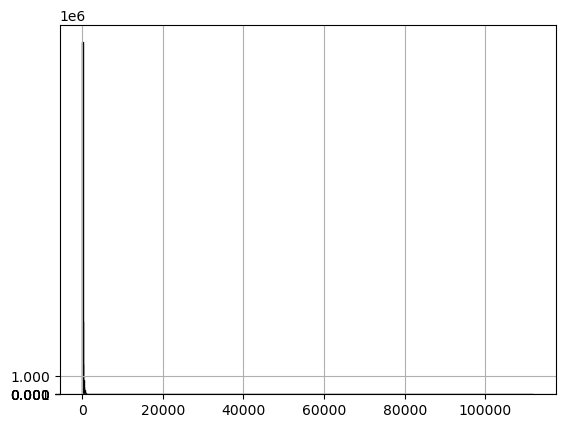

In [17]:
# Plot histogram with bins of 10,000
# Add labels and title
steps = 100
user_logs_df['num_25'].hist(
    bins=range(0, user_logs_df['num_25'].max(), steps),
    edgecolor='black'
)

# plt.xlabel('Value Ranges')
# plt.ylabel('Count')
# plt.title('Count of Values in Each 10,000 Range Bin')
# plt.xticks(range(0, user_logs_df['num_25'].max() + steps, steps))
# plt.show()